In [1]:
from plasma_classes import *
from plasma_utils import *
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm import tqdm

In [2]:
temp_ion_fluxes = []
temp_electron_fluxes = []
temp_sum_fluxes = []
temp_kinetic_history = []
temp_electric_history = []
temp_summ_history = []

In [3]:
temps = []

In [4]:
for i in range(1, 21):
    eV = 11600
    E1_factor = 1.60218e-19
    E1 = 18.3*E1_factor
    alpha = 0.62


    L = 1e-2
    N_x = 200
    N_p = 5000
    h = L/N_x
    tau = 1e-13
    n0 = 1e17
    
    #concentrations.append(n0)
    n1 = n0*N_x/N_p
    q = 1.60217e-19
    m_e = 9.1093837e-31
    m_i = 1.672e-27
    epsilon = 8.85e-12
    T_e = 11600*i
    temps.append(T_e)
    T_i = 600
    k_b = 1.38e-23
    v_t_e = math.sqrt(3*k_b*T_e/m_e)
    vmin_e = -3*v_t_e
    vmax_e = 3*v_t_e
    v_t_i = math.sqrt(3*k_b*T_i/m_i)
    vmin_i = -3*v_t_i
    vmax_i = 3*v_t_i
    ions = Particles(N_p, n1, q, m_i)
    electrons = Particles(N_p, n1, -q, m_e)
    nodes = Nodes(N_x)
    left_wall = Wall(0, L/10, 0, h, "left")
    right_wall = Wall(9*L/10, L, 0, h, "right")
    walls = (left_wall, right_wall)

    set_homogeneous(electrons, left_wall.right*h, right_wall.left*h)
    set_homogeneous(ions, left_wall.right*h, right_wall.left*h)
    set_distr(electrons, Maxwell(T_e, k_b, m_e), vmin_e, vmax_e, 1000)
    set_distr(ions, Maxwell(T_i, k_b, m_i), vmin_i, vmax_i, 1000)
    electrons.normalise(h, tau)
    ions.normalise(h, tau)
    get_rho(nodes, electrons)
    get_rho(nodes, ions)
    calc_fields(nodes, h, epsilon)
    accel(electrons, nodes, L, h, tau, zerostep=True)
    accel(ions, nodes, L, h, tau, zerostep=True)
    n = 30000

    see_dict = {"E1": E1, "alpha": alpha, "h": h, "tau": tau}
    for t in tqdm(range(n)):
        try:
            move(electrons, nodes, consistency=True)
            move(ions, nodes, consistency=True)
        except Exception:
            print("number of iteration: ", t)
            break

        nodes.rho *= 0
        account_walls(electrons, walls, SEE=see_dict)
        account_walls(ions, walls)
        get_rho(nodes, electrons)
        get_rho(nodes, ions)
        for wall in walls:
            for particles in wall.particles_lst:
                get_rho(nodes, particles)
        
        calc_fields(nodes, h, epsilon, periodic=True)
        electric_history_step = calc_electric_energy(ions, nodes) + calc_electric_energy(electrons, nodes)
        temp_electric_history.append(electric_history_step)
        accel(electrons, nodes, L, h, tau)
        accel(ions, nodes, L, h, tau)
        kinetic_history_step = calc_kinetic_energy(ions, h, tau) + calc_kinetic_energy(electrons, h, tau)
        temp_kinetic_history.append(kinetic_history_step)

    for i in range(n):
        temp_summ_history.append(temp_kinetic_history[i] + temp_electric_history[i])

    temp_electron_fluxes.append(N_p-electrons.n_macro)
    temp_ion_fluxes.append(N_p-ions.n_macro)
        

100%|██████████| 30000/30000 [15:12<00:00, 32.87it/s]


In [5]:
conc_ion_fluxes = []
conc_electron_fluxes = []
conc_sum_fluxes = []
conc_kinetic_history = []
conc_electric_history = []
conc_summ_history = []

In [6]:
concentrations = []

In [7]:
conc_k = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [8]:
for i in range(len(conc_k)):
    eV = 11600
    E1_factor = 1.60218e-19
    E1 = 18.3*E1_factor
    alpha = 0.62


    L = 1e-2
    N_x = 200
    N_p = 5000
    h = L/N_x
    tau = 1e-13
    n0 = 1e17*conc_k[i]
    concentrations.append(n0)
    n1 = n0*N_x/N_p
    q = 1.60217e-19
    m_e = 9.1093837e-31
    m_i = 1.672e-27
    epsilon = 8.85e-12
    T_e = 11600*20
    #temps.append(T_e)
    T_i = 600
    k_b = 1.38e-23
    v_t_e = math.sqrt(3*k_b*T_e/m_e)
    vmin_e = -3*v_t_e
    vmax_e = 3*v_t_e
    v_t_i = math.sqrt(3*k_b*T_i/m_i)
    vmin_i = -3*v_t_i
    vmax_i = 3*v_t_i
    ions = Particles(N_p, n1, q, m_i)
    electrons = Particles(N_p, n1, -q, m_e)
    nodes = Nodes(N_x)
    left_wall = Wall(0, L/10, 0, h, "left")
    right_wall = Wall(9*L/10, L, 0, h, "right")
    walls = (left_wall, right_wall)

    set_homogeneous(electrons, left_wall.right*h, right_wall.left*h)
    set_homogeneous(ions, left_wall.right*h, right_wall.left*h)
    set_distr(electrons, Maxwell(T_e, k_b, m_e), vmin_e, vmax_e, 1000)
    set_distr(ions, Maxwell(T_i, k_b, m_i), vmin_i, vmax_i, 1000)
    electrons.normalise(h, tau)
    ions.normalise(h, tau)
    get_rho(nodes, electrons)
    get_rho(nodes, ions)
    calc_fields(nodes, h, epsilon)
    accel(electrons, nodes, L, h, tau, zerostep=True)
    accel(ions, nodes, L, h, tau, zerostep=True)
    n = 30000
    see_dict = {"E1": E1, "alpha": alpha, "h": h, "tau": tau}
    for t in tqdm(range(n)):
        try:
            move(electrons, nodes, consistency=True)
            move(ions, nodes, consistency=True)
        except Exception:
            print("number of iteration: ", t)
            break

        nodes.rho *= 0
        account_walls(electrons, walls, SEE=see_dict)
        account_walls(ions, walls)
        get_rho(nodes, electrons)
        get_rho(nodes, ions)
        for wall in walls:
            for particles in wall.particles_lst:
                get_rho(nodes, particles)
        
        calc_fields(nodes, h, epsilon, periodic=True)
        electric_history_step = calc_electric_energy(ions, nodes) + calc_electric_energy(electrons, nodes)
        conc_electric_history.append(electric_history_step)
        accel(electrons, nodes, L, h, tau)
        accel(ions, nodes, L, h, tau)
        kinetic_history_step = calc_kinetic_energy(ions, h, tau) + calc_kinetic_energy(electrons, h, tau)
        conc_kinetic_history.append(kinetic_history_step)

    for i in range(n):
        conc_summ_history.append(conc_kinetic_history[i] + conc_electric_history[i])



    conc_electron_fluxes.append(N_p-electrons.n_macro)
    conc_ion_fluxes.append(N_p-ions.n_macro)
        

100%|██████████| 30000/30000 [14:46<00:00, 33.84it/s]


In [21]:
temp_electron_fluxes = np.array(temp_electron_fluxes)
temp_ion_fluxes = np.array(temp_ion_fluxes)
conc_electron_fluxes = np.array(conc_electron_fluxes)
conc_ion_fluxes = np.array(conc_ion_fluxes)

In [22]:
temp_electric_history = np.array(temp_electric_history)
temp_kinetic_history = np.array(temp_kinetic_history)
temp_summ_history = np.array(temp_summ_history)

In [23]:
conc_electric_history = np.array(conc_electric_history)
conc_kinetic_history = np.array(conc_kinetic_history)
conc_summ_history = np.array(conc_summ_history)

In [24]:
temp_electric_history = temp_electric_history.reshape(20, 30000)
temp_kinetic_history = temp_kinetic_history.reshape(20, 30000)
temp_summ_history = temp_summ_history.reshape(20, 30000)

In [25]:
conc_electric_history = conc_electric_history.reshape(9, 30000)
conc_kinetic_history = conc_kinetic_history.reshape(9, 30000)
conc_summ_history = conc_summ_history.reshape(9, 30000)

In [26]:
def central_difference(arr, dt):
    first_deriv = np.zeros_like(arr)
    first_deriv[0] = (arr[1] - arr[0]) / dt
    first_deriv[1:-1] = (arr[2:] - arr[:-2]) / (2 * dt)
    first_deriv[-1] = (arr[-1] - arr[-2]) / dt

    return first_deriv

In [27]:
def history2flux(history: np.array, tau):
    res = []
    for i in range(history.shape[0]):
        diff = np.mean(central_difference(history[i], tau))
        res.append(diff)
    return res

In [28]:
temp_electric_flux = history2flux(temp_electric_history, tau)
temp_kinetic_flux = history2flux(temp_kinetic_history, tau)
temp_summ_flux = history2flux(temp_summ_history, tau)
conc_electric_flux = history2flux(conc_electric_history, tau)
conc_kinetic_flux = history2flux(conc_kinetic_history, tau)
conc_summ_flux = history2flux(conc_summ_history, tau)

In [29]:
temps = np.array(temps)
concentrations = np.array(concentrations)

Text(0.5, 1.0, 'Зависимость потоков энергии от температуры электронов')

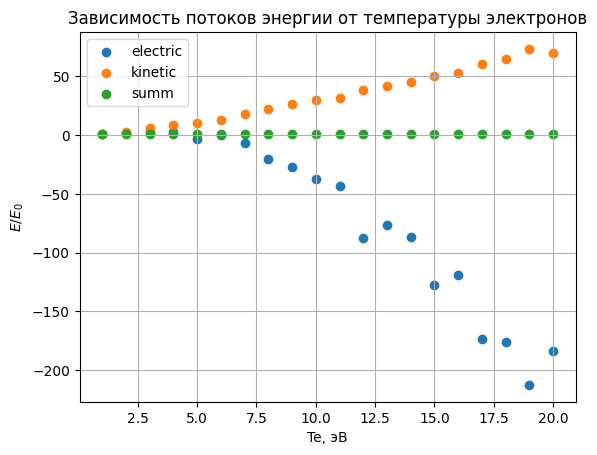

In [30]:
plt.scatter(temps/11600, temp_electric_flux/temp_electric_flux[0], label="electric")
plt.scatter(temps/11600, temp_kinetic_flux/temp_kinetic_flux[0], label="kinetic")
plt.scatter(temps/11600, temp_summ_flux/temp_summ_flux[0], label="summ")
plt.legend()
plt.grid()
plt.xlabel("Te, эВ")
plt.ylabel(f"$E/E_0$")
plt.title("Зависимость потоков энергии от температуры электронов")

Text(0.5, 1.0, 'Зависимость потоков энергии от концентрации плазмы')

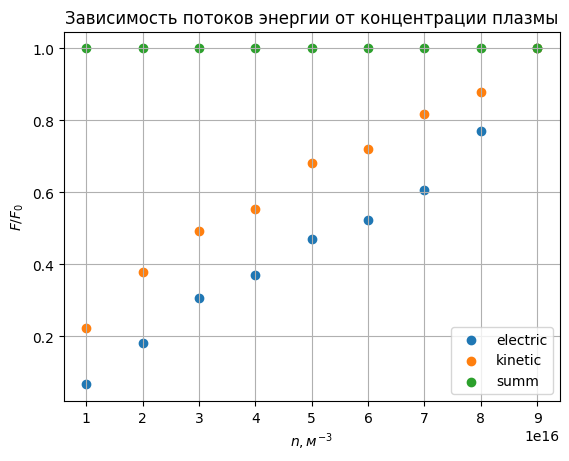

In [31]:
plt.scatter(concentrations, conc_electric_flux/conc_electric_flux[0], label="electric")
plt.scatter(concentrations, conc_kinetic_flux/conc_kinetic_flux[0], label="kinetic")
plt.scatter(concentrations, conc_summ_flux/conc_summ_flux[0], label="summ")
plt.legend()
plt.grid()
plt.xlabel(r"$n, м^{-3}$")
plt.ylabel(f"$F/F_0$")
plt.title("Зависимость потоков энергии от концентрации плазмы")

Text(0.5, 1.0, 'Зависимость потоков частиц от температуры электронов')

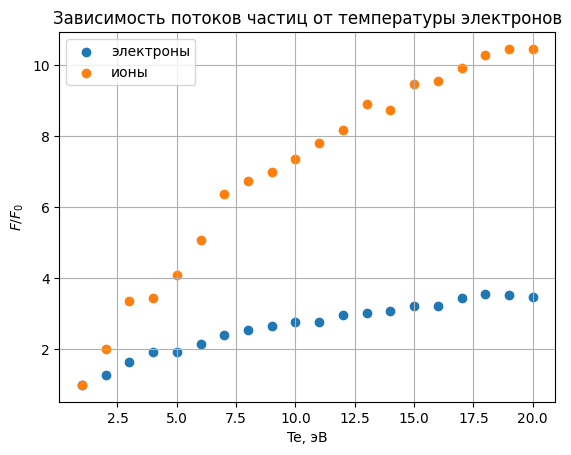

In [32]:
plt.scatter(temps/11600, temp_electron_fluxes/temp_electron_fluxes[0], label="электроны")
plt.scatter(temps/11600, temp_ion_fluxes/temp_ion_fluxes[0], label="ионы")
plt.legend()
plt.grid()
plt.xlabel("Te, эВ")
plt.ylabel(f"$F/F_0$")
plt.title("Зависимость потоков частиц от температуры электронов")

Text(0.5, 1.0, 'Зависимость потоков частиц от концентрации плазмы')

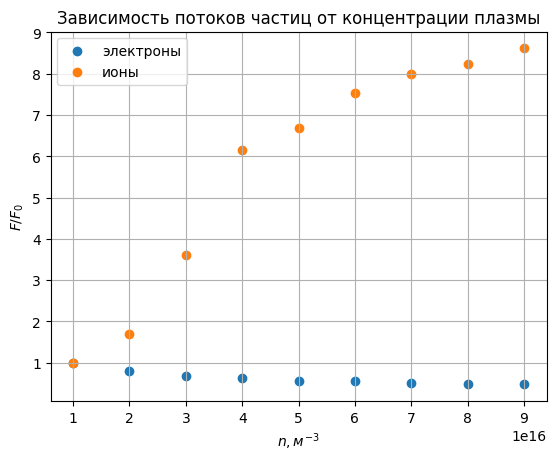

In [33]:
plt.scatter(concentrations, conc_electron_fluxes/conc_electron_fluxes[-1], label="электроны")
plt.scatter(concentrations, conc_ion_fluxes/conc_ion_fluxes[-1], label="ионы")
plt.legend()
plt.grid()
plt.xlabel(r"$n, м^{-3}$")
plt.ylabel(f"$F/F_0$")
plt.title("Зависимость потоков частиц от концентрации плазмы")